In [1]:
#import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame
from collections import Counter


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read from csv file 
df = pd.read_csv('glass3.csv')

# 214 examples; 9 features ; binary class
# show all data, examples and labels
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [3]:
X = df.values[:, 0:9]
y = df.values[:, 9]

In [4]:
len(df)

214

In [5]:
print(sorted(Counter(y).items()))

[(0.0, 197), (1.0, 17)]


In [6]:
X

array([[  1.52101,  13.64   ,   4.49   , ...,   8.75   ,   0.     ,   0.     ],
       [  1.51761,  13.89   ,   3.6    , ...,   7.83   ,   0.     ,   0.     ],
       [  1.51618,  13.53   ,   3.55   , ...,   7.78   ,   0.     ,   0.     ],
       ..., 
       [  1.52065,  14.36   ,   0.     , ...,   8.44   ,   1.64   ,   0.     ],
       [  1.51651,  14.38   ,   0.     , ...,   8.48   ,   1.57   ,   0.     ],
       [  1.51711,  14.23   ,   0.     , ...,   8.62   ,   1.67   ,   0.     ]])

In [7]:
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

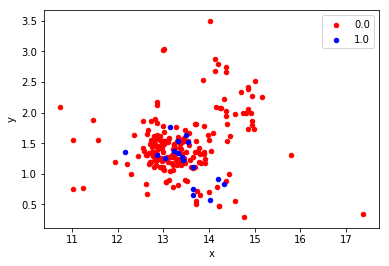

In [14]:
#visualize the data before any work is done
dt = DataFrame(dict(x=X[:,1], y=X[:,3], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [29]:
# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [30]:
# number of examples after applying the algorithm
len(X_res)

394

In [31]:
# of examples for each class
print(sorted(Counter(y_res).items()))

[(0.0, 197), (1.0, 197)]


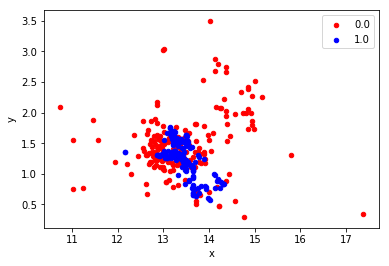

In [32]:
#visualize the data after algorithm is complete
dt = DataFrame(dict(x=X_res[:,1], y=X_res[:,3], label=y_res))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

(sampling_strategy='auto', random_state=None, k_neighbors=5, 
m_neighbors='deprecated', out_step='deprecated', kind='deprecated', 
 svm_estimator='deprecated', n_jobs=1, ratio=None)
                                                        

In [25]:
# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.3, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [26]:
len(X_res)

256

In [27]:
# of examples for each class
print(sorted(Counter(y_res).items()))

[(0.0, 197), (1.0, 59)]


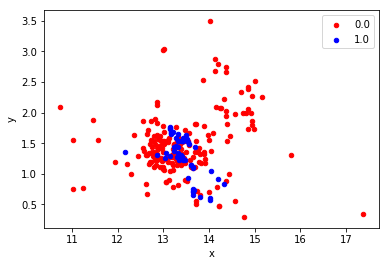

In [28]:
#visualize the data after algorithm is complete
dt = DataFrame(dict(x=X_res[:,1], y=X_res[:,3], label=y_res))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()